# Analysis of GRB 220627A with GBM, LLE and LAT data

In [1]:
import warnings
warnings.simplefilter("ignore")
from threeML import *
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
%matplotlib inline

18:05:37 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=953241;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=719086;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=106045;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=750600;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

18:05:38 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=163213;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=644295;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

18:05:38 INFO      Starting 3ML!                                                                     ]8;id=151925;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=846228;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=904547;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=197615;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=333271;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=767691;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=623898;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=302049;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=473033;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=649484;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=491913;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=598864;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=200301;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=593634;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=936626;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=470749;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=627152;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=643494;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:05:39 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=871414;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=579312;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=103128;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=133246;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=695752;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=861566;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [16]:
gbm_catalog = FermiGBMBurstCatalog()
source_name = 'GRB130427324'
gbm_catalog.query_sources(source_name)
grb_info = gbm_catalog.get_detector_information()[source_name]
grb_info

{'source': {'fluence': '4.096000-142.338000', 'peak': '8.192000-9.216000'},
 'background': {'pre': '-285.420000--41.670000',
  'post': '381.250000-500.000000',
  'full': '-285.420000--41.670000,381.250000-500.000000'},
 'trigger': 'bn130427324',
 'detectors': array(['n6', 'n9', 'na', 'b1'], dtype='<U2'),
 'best fit model': {'fluence': 'band', 'peak': 'band'},
 'ra': 173.136,
 'dec': 27.7129}

In [2]:
trigger_name = 'bn130427324'
met = 388741629.420
ra = 173.136
dec = 27.7129
tstart = 0
tstop = 100
gbm_detectors = ['n6', 'n9', 'b1']
roi = 10
zmax = 100.0
thetamax = 180.0
irf = "p8_transient010e"

## Prepare GBM data

In [3]:
dload = download_GBM_trigger_data(trigger_name, detectors=gbm_detectors)

In [23]:
bkg_selection = ["-285--41","310-355"]
gbm_plugins = []
time_series = {}
for det in gbm_detectors:
    
    # Use CSPEC data to fit the background using the background selections. 
    # We use CSPEC because it has a longer duration for fitting the background.
    
    ts_cspec = TimeSeriesBuilder.from_gbm_cspec_or_ctime(
        det, cspec_or_ctime_file=dload[det]["cspec"], rsp_file=dload[det]["rsp"]
    )

    ts_cspec.set_background_interval(*bkg_selection)
    # The background is saved to an HDF5 file that stores the polynomial coefficients and selections
    ts_cspec.save_background(f"{det}_bkg.h5", overwrite=True)

    # We use TTE data for the actual spectral analysis
    ts_tte = TimeSeriesBuilder.from_gbm_tte(
        det,
        tte_file=dload[det]["tte"],
        rsp_file=dload[det]["rsp"],
        restore_background=f"{det}_bkg.h5",
    )

    time_series[det] = ts_tte

    # The source selection from the catalog is set
    ts_tte.set_active_time_interval("%d-%d" % (tstart, tstop))

    # The plugin for the time integrated analysis is created for each detector
    fluence_plugin = ts_tte.to_spectrumlike()

    # GBM channel selections for spectral analysis
    if det.startswith("b"):
        fluence_plugin.set_active_measurements("900-30000")

    else:
        fluence_plugin.set_active_measurements("40-900")

    fluence_plugin.rebin_on_background(1.0)

    gbm_plugins.append(fluence_plugin)

18:24:01 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=722069;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=216737;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=839032;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=274655;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          


WARNING RuntimeWarning: invalid value encountered in divide



Loading PHAII Spectra:   0%|                                                    | 0/2182 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in divide



18:24:02 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=782699;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=100447;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=494773;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=623254;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=225323;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=555080;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=232614;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=994249;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=654222;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=611149;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=360962;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=490193;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=896129;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=307960;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=66724;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=91089;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=765155;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=257568;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=98615;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=240187;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=683280;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=90473;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=71399;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=692622;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=428581;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=325156;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=663865;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=88875;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

18:24:03 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=988038;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=505707;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=503321;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=322761;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=626560;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=571182;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=138361;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=191453;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=190945;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=466688;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=881367;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=881999;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

         INFO      Auto-determined polynomial order: 1                                ]8;id=179233;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=325773;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_06 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

18:24:11 INFO      None 1-order polynomial fit with the mle method                               ]8;id=723186;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=506910;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n6_bkg.h5                                         ]8;id=930056;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=497082;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n6_bkg.h5                                         ]8;id=746539;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=229762;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file /shared/grb/glg_tte_n6_bn130427324_v00.fit.gz contains duplicate     ]8;id=385437;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=619636;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#43\43]8;;\
                  time tags and is thus invalid. Contact the FSSC                                                  

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=365241;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=733404;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=620541;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=104997;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=950351;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=960453;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=193513;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=14103;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=149530;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=906623;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=444195;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=612566;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=273862;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=867077;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=317318;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=758185;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=483023;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=104352;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=329368;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=651252;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=923313;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=671848;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=59075;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=508547;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=398978;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=493140;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=882807;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=441520;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=478230;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=571615;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=598839;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=337435;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=333886;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=249085;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=873776;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=643821;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=349941;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=634086;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=120406;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=704318;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

18:24:12 INFO      Successfully restored fit from n6_bkg.h5                              ]8;id=371910;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=682244;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Interval set to 0.0-100.0 for n6                                      ]8;id=231326;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=28482;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=340302;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=830126;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=532571;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=721648;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=666972;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=663289;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 40-900 translates to channels 26-123                                  ]8;id=286814;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=160634;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 98 bins                                                           ]8;id=196817;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=779634;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=782620;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=744424;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=563782;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=332212;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=834643;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=158506;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              


WARNING RuntimeWarning: invalid value encountered in divide



Loading PHAII Spectra:   0%|                                                    | 0/2182 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in divide



18:24:13 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=646963;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=802809;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=626145;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=796883;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=850922;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=614152;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=199727;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=173795;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=658838;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=598741;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=299063;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=752638;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=404569;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=536738;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=795178;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=251857;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=18961;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=273026;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=761717;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=624011;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=891868;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=593712;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=137105;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=910464;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=562022;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=943842;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=676596;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=805717;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=331472;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=317969;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=881672;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=893164;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=947856;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=545701;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=517046;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=884294;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=427160;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=458084;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=221350;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=662505;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=220117;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=235195;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=15273;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=171824;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=574635;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=289910;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=388742;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=702790;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=969534;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=979450;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=260586;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=789986;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=110240;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=251814;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=533262;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=455934;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=894764;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=995801;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=19975;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=708616;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=959227;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=777093;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

18:24:14 INFO      Auto-determined polynomial order: 2                                ]8;id=62845;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=777403;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_NAI_09 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

18:24:22 INFO      None 2-order polynomial fit with the mle method                               ]8;id=684108;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=434575;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n9_bkg.h5                                         ]8;id=884105;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=660839;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n9_bkg.h5                                         ]8;id=221304;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=169421;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         WARNING   The TTE file /shared/grb/glg_tte_n9_bn130427324_v00.fit.gz contains duplicate     ]8;id=503491;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=438885;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#43\43]8;;\
                  time tags and is thus invalid. Contact the FSSC                                                  

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=389685;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=166211;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=2650;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=17533;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=782268;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=827150;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=30624;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=923147;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=114288;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=991910;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=676916;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=485372;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=810516;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=998126;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=996971;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=856173;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=689618;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=730266;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=991331;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=470740;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=929962;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=277872;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=14901;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=2596;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

18:24:23 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=81658;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=654667;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=937371;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=166010;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=372088;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=880629;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=627980;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=850721;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=43569;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=25474;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=329895;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=625907;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=195661;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=250338;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=703318;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=660630;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=939286;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=60008;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=111741;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=49358;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=592762;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=995763;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=135831;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=615244;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=442851;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=134504;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=656196;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=735916;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=917633;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=939065;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=528223;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=212074;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=671773;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=521751;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=950455;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=992607;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=197289;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=657266;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         INFO      Successfully restored fit from n9_bkg.h5                              ]8;id=583929;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=691447;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         WARNING   Minimum MC energy (5.0) is larger than minimum EBOUNDS energy                    ]8;id=434700;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=143674;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#140\140]8;;\
                  (4.410999774932861)                                                                              

         INFO      Interval set to 0.0-100.0 for n9                                      ]8;id=856340;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=874737;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=405263;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=956762;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=318511;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=434734;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=709110;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=389307;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 40-900 translates to channels 27-124                                  ]8;id=283303;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=798100;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 98 bins                                                           ]8;id=391833;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=521912;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=707101;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=497119;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=72799;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=315086;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          


WARNING RuntimeWarning: invalid value encountered in divide



Loading PHAII Spectra:   0%|                                                    | 0/2182 [00:00<?, ?it/s]


WARNING RuntimeWarning: invalid value encountered in divide



18:24:24 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=90099;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=959069;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=941323;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=820534;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=104634;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=574904;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=5967;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=508516;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=426689;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=848549;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=962211;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=938743;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=510378;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=580716;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=798323;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=541387;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=221396;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=290832;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=448264;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=775490;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=316791;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=735235;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=594154;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=113880;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=626577;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=733922;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=653829;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=545319;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=836708;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=743712;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=925323;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=160905;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=297049;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=662266;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=134881;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=352630;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

18:24:25 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=682965;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=93700;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=439669;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=417581;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

         INFO      Auto-determined polynomial order: 2                                ]8;id=623805;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py\binned_spectrum_series.py]8;;\:]8;id=844556;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/binned_spectrum_series.py#389\389]8;;\

Fitting GBM_BGO_01 background:   0%|                                             | 0/128 [00:00<?, ?it/s]

18:24:33 INFO      None 2-order polynomial fit with the mle method                               ]8;id=972063;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=877328;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to b1_bkg.h5                                         ]8;id=275268;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=674684;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to b1_bkg.h5                                         ]8;id=417425;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=295362;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

18:24:34 WARNING   The TTE file /shared/grb/glg_tte_b1_bn130427324_v00.fit.gz contains duplicate     ]8;id=13794;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py\gbm_data.py]8;;\:]8;id=623173;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/gbm_data.py#43\43]8;;\
                  time tags and is thus invalid. Contact the FSSC                                                  

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=502457;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=118380;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=655220;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=933266;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 2) ]8;id=576969;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=192112;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=956891;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=100845;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 3) ]8;id=448504;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=939056;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=471001;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=439024;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 4) ]8;id=572197;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=904718;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=104592;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=190165;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 5) ]8;id=696248;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=658834;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=163941;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=700597;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 6) ]8;id=770250;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=221478;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=167540;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=778772;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 7) ]8;id=530479;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=972171;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=231272;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=272403;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 8) ]8;id=386512;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=568993;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=521269;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=507587;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 9) ]8;id=700312;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=590211;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                        
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=82223;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=978857;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX',    ]8;id=716753;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=493257;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  10) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                    
                  'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP                
                  MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'                                    

         WARNING   No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming        ]8;id=679352;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=826824;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#611\611]8;;\
                  TLMIN=1                                                                                          

         INFO      Successfully restored fit from b1_bkg.h5                              ]8;id=230062;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=595833;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#171\171]8;;\

         INFO      Interval set to 0.0-100.0 for b1                                      ]8;id=712540;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=335054;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=29695;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=676379;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=401370;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=487161;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=259596;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=550907;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 900-30000 translates to channels 20-119                               ]8;id=949602;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=319424;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 100 bins                                                          ]8;id=174787;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=983863;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

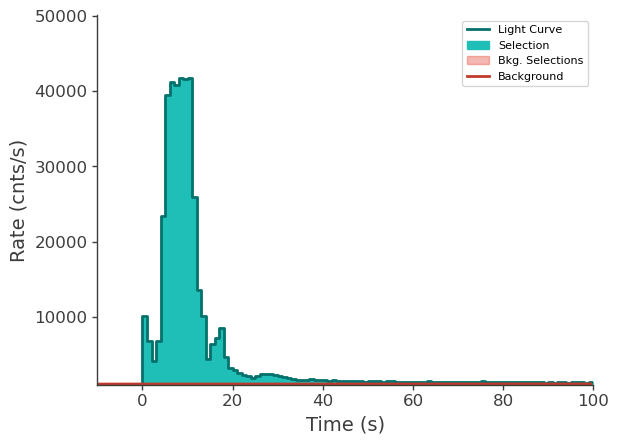

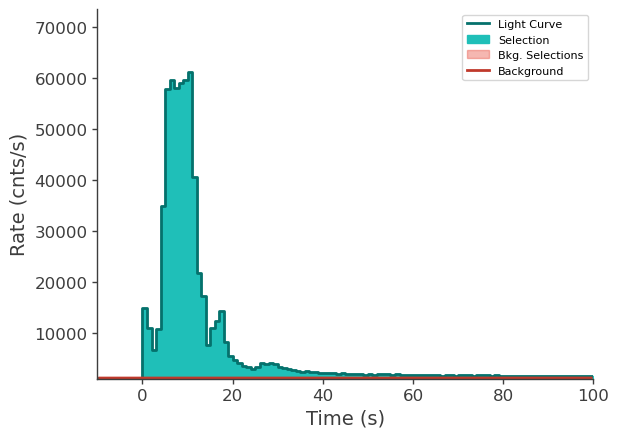

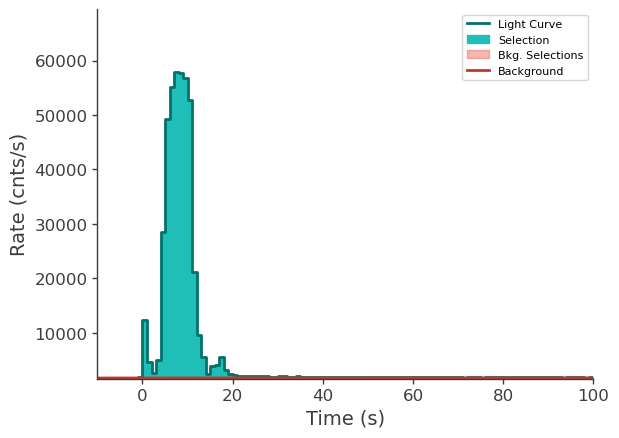

In [5]:
time_series['n6'].view_lightcurve(-10, 100);
time_series['n9'].view_lightcurve(-10, 100);
time_series['b1'].view_lightcurve(-10, 100);

## Prepare LLE data

In [6]:
lle_dload = download_LLE_trigger_data(trigger_name)

In [7]:
bkg_selection = ["-285--41","400-500"]
emin, emax = 30*u.MeV, 100*u.MeV
lle_time_series = TimeSeriesBuilder.from_lat_lle("lat_lle", lle_file=lle_dload["lle"], ft2_file=lle_dload["ft2"], rsp_file=lle_dload["rsp"]
)
lle_time_series.set_background_interval(*bkg_selection)
lle_time_series.save_background("lle_bkg.h5", overwrite=True)

lle_time_series.set_active_time_interval("%d-%d" % (tstart, tstop))

lle_plugin = lle_time_series.to_spectrumlike()
lle_plugin.set_active_measurements("%d-%d" % (emin.to('keV').value, emax.to('keV').value))
lle_plugin.use_effective_area_correction(0.8, 1.2)

18:09:56 WARNING   The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) ]8;id=72777;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py\response.py]8;;\:]8;id=98868;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/OGIP/response.py#476\476]8;;\
                  not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'                                          

Finding best polynomial Order:   0%|                                               | 0/4 [00:00<?, ?it/s]

18:09:57 INFO      Auto-determined polynomial order: 2                                            ]8;id=906638;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=213959;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GLAST_LLE background:   0%|                                               | 0/50 [00:00<?, ?it/s]

18:10:00 INFO      None 2-order polynomial fit with the mle method                               ]8;id=996957;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=597532;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to lle_bkg.h5                                        ]8;id=719029;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=952092;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to lle_bkg.h5                                        ]8;id=893204;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=98670;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

         INFO      Interval set to 0.0-100.0 for lat_lle                                 ]8;id=79954;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=784063;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=317293;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=427824;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=459025;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=228885;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=725455;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=235410;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 30000-100000 translates to channels 5-12                              ]8;id=702918;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=320124;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      lat_lle is using effective area correction (between 0.8 and 1.2)            ]8;id=468755;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=304713;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#2279\2279]8;;\

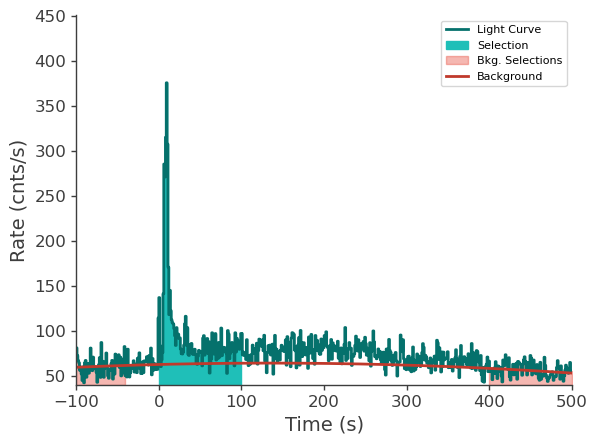

In [8]:
lle_time_series.view_lightcurve(-100, 500);

## Prepare LAT data

In [9]:
LATdataset = LAT_dataset()

LATdataset.make_LAT_dataset(
    ra=ra,
    dec=dec,
    radius=12,
    trigger_time=met,
    tstart=0,
    tstop=1000,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0, #100 MeV
    Emax=100000.0, #100 GeV
)

18:11:05 INFO      Query parameters:                                                       ]8;id=335039;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=229464;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 173.1360,27.7129                       ]8;id=738928;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=996093;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=290036;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=799181;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=825282;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=742313;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 388741629.42,388742629.42              ]8;id=107356;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=975437;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=411216;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=905163;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,100000.000                     ]8;id=577514;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=879491;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Extended                               ]8;id=687154;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=182626;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=378839;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=944599;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=115724;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=41761;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: ec3bd58c9484a4abd12bcf252f186da3                              ]8;id=133277;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=38991;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

18:11:07 INFO      Estimated complete time for your query: 16 seconds                      ]8;id=562968;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=489897;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#428\428]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=682933;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=174381;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#437\437]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2405311                         
                  41107F7F982E776 (when ready)                                                                     

18:11:13 INFO      Downloading FT1 and FT2 files...                                        ]8;id=604642;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=895630;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#527\527]8;;\

18:11:21 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=737947;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=321877;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn130427324/gll_cspec_tr_bn130427324_v00.rsp...
time -p gtselect infile=./bn130427324/gll_ft1_tr_bn130427324_v00.fit outfile=__temp_ft1.fits ra=173.136 dec=27.7129 rad=15.0 tmin=388741628.42 tmax=388742630.42 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.13
user 0.36
sys 1.44
Writing ./bn130427324/gll_cspec_tr_bn130427324_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...

time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbindef version HEAD
real 0.01
user 0.00
sys 0.00
time -p gtbin evfile=/shared/grb/__temp_ft1.fits scfile=/shared/grb/bn130427324/gll_ft2_tr_bn130427324_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=20

time -p gtmktime scfile=/shared/grb/bn130427324/gll_ft2_tr_bn130427324_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,173.136,27.7129)<=(100.0-10))" roicut=no evfile=/shared/grb/bn130427324/gll_ft1_tr_bn130427324_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn130427324_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=388741629.42 tstop=388742629.42 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.09
user 0.24
sys 0.88

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn130427324_v00_mkt.fit outfile=gll_ft1_tr_bn130427324_v00_filt.fit ra=173.136 dec=27.7129 rad=10.0 tmin=388741629.42 tmax=388742629.42 emin=100.0 emax=100000.0 zmin=0.0 zmax=100.0 evclass=32 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.13
user 0.39
sys 1.38

Selected 540 events.


18:12:15 INFO      Extracted 540 events                                                    ]8;id=547518;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=980715;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#670\670]8;;\

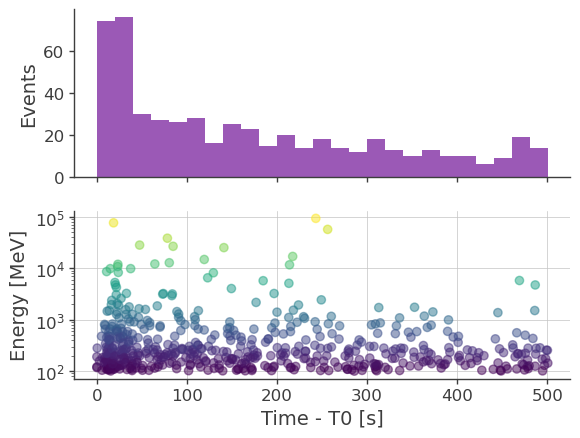

In [12]:
LATdataset.extract_events(roi, zmax, irf)

with fits.open(LATdataset.filt_file) as event_file:
    lat_events = event_file["EVENTS"].data
event_times = lat_events["TIME"] - met

%matplotlib inline
fig, axs = plt.subplots(2, 1, sharex=True)
plt.sca(axs[0])
plt.hist(event_times);
plt.ylabel('Events')
plt.sca(axs[1])
plt.scatter(event_times, lat_events['ENERGY'], marker='o', c=lat_events['ENERGY'], norm='log',
            alpha=0.5, zorder=20);
plt.yscale('log')
plt.ylabel('Energy [MeV]')
plt.xlabel('Time - T0 [s]')
plt.grid(True)
plt.show()

In [13]:
analysis_builder = TransientLATDataBuilder(
    LATdataset.grb_name,
    outfile=LATdataset.grb_name,
    roi=roi,
    tstarts="%d" % tstart,
    tstops="%d" % tstop,
    irf=irf,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                      130427324
roi                                 10
tstarts                              0
tstops                             100
zmax                             100.0
emin                             100.0
emax                          100000.0
irf                   p8_transient010e
galactic_model                template
particle_model          isotr template
source_model                 PowerLaw2
tsmin                             20.0
strategy                          time
thetamax                         180.0
spectralfiles                       no
liketype                      unbinned
optimizeposition                    no
datarepository                       .
ltcube                                
expomap                               
ulphindex                           -2
flemin                             100
flemax                           10000
fgl_mode                          fast
filter_GTI                       False
likelihood_profile       

In [18]:
LAT_observations = analysis_builder.run(recompute_intervals=True)
LAT_plugin = LAT_observations[0].to_LATLike()

18:19:34 INFO      Changing permission to                                              ]8;id=766074;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=334569;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#635\635]8;;\
                  /opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermitools/GtBu                             
                  rst/scripts/doTimeResolvedLike.py                                                                

         INFO      About to run the following command:                                 ]8;id=361134;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=717749;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#640\640]8;;\
                  /opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermitools/GtBu                             
                  rst/scripts/doTimeResolvedLike.py 130427324 --outfile '130427324'                                
                  --roi 10.000000 --tstarts '0' --tstops '100' --zmax 100.000000                                   
                  --emin 100.000000 --emax 100000.000000 --irf 'p8_transient010e'                                  
                  --galactic_model 'template' --particle_model 'isotr template'                                    
                  --source_model 'PowerLaw2' --tsmin 20.000000 --strategy 'time'                                   
                  --thetamax 180.000000 --spectralfiles 'no' --liketype 'unbinned'                                 
                  --optimizeposition 'no' --datarepository '.' --ltcube '' --expomap                               
                  '' --ulphindex -2.000000 --flemin 100.000000 --flemax 10000.000000                               
                  --fgl_mode 'fast'                                                                                

         INFO      You have choosen to recompute the time intervals in this folder     ]8;id=183541;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=516490;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#654\654]8;;\

         INFO      The older entries will be moved to                                  ]8;id=122318;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=799514;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#658\658]8;;\
                  tmp_a45d9ae1-285c-4c04-92f3-f938fb46661c                                                         

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    600.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   771.6132     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .65E-05    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/opt/anaconda/envs/fermi/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()



Requested intervals:
------------------------------------------------------
0.0                  - 100.0

Data files:
-----------
eventfile            /shared/grb/bn130427324/gll_ft1_tr_bn130427324_v00.fit
ft2file              /shared/grb/bn130427324/gll_ft2_tr_bn130427324_v00.fit
rspfile              /shared/grb/bn130427324/gll_cspec_tr_bn130427324_v00.rsp
cspecfile            /shared/grb/bn130427324/gll_cspec_tr_bn130427324_v00.pha

ROI:
-----
R.A.                 173.136
Dec.                 27.7129
Radius               10.0

Interval # 1 (0.0-100.0):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/shared/grb/bn130427324/gll_ft1_tr_bn130427324_v00.fit' zmax='100.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='130427324_LAT_skymap_0.0-100.0.fit' rspfile='/shared/grb/bn130427324/gll_cspec_tr_bn130427324_v00.rsp' strategy='time' ft2file='/shared/grb/bn130427324/gll_ft2_tr_bn130427324_v00.fit' tstart='0.0' tstop='100.0' ra='173.136' dec='27.7129' irf='p8_tr

18:20:10 INFO      The ft2 file does not exist. Please examine!                        ]8;id=682701;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=730624;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#726\726]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=757000;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=766749;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#727\727]8;;\

         INFO      copied ./bn130427324/gll_ft2_tr_bn130427324_v00.fit to              ]8;id=930849;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=36784;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#743\743]8;;\
                  interval0.0-100.0/gll_ft2_tr_bn130427324_v00.fit                                                 

FermiLATLike - GTI SUM =  100.0


## Define the first model to test

In [27]:
band = Band()
band.alpha.prior = Truncated_gaussian(lower_bound=-1.5, upper_bound=1, mu=-1, sigma=0.5)
band.beta.prior = Truncated_gaussian(lower_bound=-5, upper_bound=-1.6, mu=-2, sigma=0.5)
band.xp.prior = Log_normal(mu=2, sigma=1)
band.xp.bounds = (None, None)
band.K.prior = Log_uniform_prior(lower_bound=1e-10, upper_bound=1e3)
source = PointSource(trigger_name, ra, dec, spectral_shape=band)
band_model = Model(source)

18:25:52 WARNING   We have set the min_value of Band.xp to 1e-99 because there was a postive       ]8;id=763270;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=254256;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  transform                                                                                        

         WARNING   We have set the min_value of Band.xp to 1e-99 because there was a postive       ]8;id=500650;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=533337;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\
                  transform                                                                                        

## Run the joint fit

In [28]:
datalist_1 = DataList(*gbm_plugins, lle_plugin, LAT_plugin)
jl_1 = JointLikelihood(band_model, datalist_1, verbose=False)
band_model.display()
print(jl_1.data_list.keys())
# This is needed to fix the galactic template to 1 (if needed) 
band_model[LAT_plugin.get_name() + "_GalacticTemplate_Value"].value = 1.0
band_model[LAT_plugin.get_name() + "_GalacticTemplate_Value"].fix = True
band_model[LAT_plugin.get_name() + "_IsotropicTemplate_Normalization"].fix = False
#sbpl_model.display(complete=True)
jl_1.set_minimizer("minuit")
jl_1.fit();


Found Isotropic template for irf P8R3_TRANSIENT010E_V3: /opt/anaconda/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT010E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT010E_V3: /opt/anaconda/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



18:26:01 INFO      set the minimizer to minuit                                             ]8;id=558186;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=506752;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (7):
--------------------

                                             value min_value max_value  \
bn130427324.spectrum.main.Band.K            0.0001       0.0      None   
bn130427324.spectrum.main.Band.alpha          -1.0      -1.5       3.0   
bn130427324.spectrum.main.Band.xp            500.0       0.0      None   
bn130427324.spectrum.main.Band.beta           -2.0      -5.0      -1.6   
cons_lat_lle                                   0.8       0.8       1.2   
LAT0X100_GalacticTemplate_Value                1.0       0.5       1.5   
LAT0X100_IsotropicTemplate_Normalization  4.999937       0.1       5.0   

                                                    unit  
bn130427324.spectrum.main.Band.K          keV-1 s-1 cm-2  
bn130427324.spectrum.main.Band.alpha                      
bn130427324.spectrum.main.Band.xp                    keV  
bn130427324.spectrum.main.Band.beta                       
cons_lat_lle                                              
LAT0X100_GalacticTemplate_Value                           
LAT0X100_IsotropicTemplate_Normalization                  

Fixed parameters (6):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

odict_keys(['n6', 'n9', 'b1', 'lat_lle', 'LAT0X100'])


         INFO      set the minimizer to MINUIT                                             ]8;id=596869;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=919582;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1062\1062]8;;\

18:26:02 WARNING   75.84 percent of samples have been thrown away because they failed the  ]8;id=844982;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=695702;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py#1740\1740]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

Best fit values:

result  \
parameter                                                                 
bn130427324.spectrum.main.Band.K              (1.496 +/- 0.004) x 10^-1   
bn130427324.spectrum.main.Band.alpha           (-9.12 +/- 0.05) x 10^-1   
bn130427324.spectrum.main.Band.xp                (7.76 +/- 0.07) x 10^2   
bn130427324.spectrum.main.Band.beta                    -2.837 +/- 0.011   
cons_lat_lle                              (8.00000 +/- 0.00008) x 10^-1   
LAT0X100_IsotropicTemplate_Normalization              5.0000 +/- 0.0021   

                                                     unit  
parameter                                                  
bn130427324.spectrum.main.Band.K          1 / (keV s cm2)  
bn130427324.spectrum.main.Band.alpha                       
bn130427324.spectrum.main.Band.xp                     keV  
bn130427324.spectrum.main.Band.beta                        
cons_lat_lle                                               
LAT0X100_IsotropicTemplate_Normalization

Correlation matrix:

1.00  0.55 -0.84  0.32  0.00  0.00
 0.55  1.00 -0.78  0.26  0.00  0.00
-0.84 -0.78  1.00 -0.41 -0.00 -0.00
 0.32  0.26 -0.41  1.00  0.00  0.00
 0.00  0.00 -0.00  0.00  1.00  0.00
 0.00  0.00 -0.00  0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n6             1110.031702
n9             1063.053550
b1              896.403976
lat_lle          85.193456
LAT0X100       1913.524776
total          5068.207461

Values of statistical measures:

statistical measures
AIC          10148.573412
BIC          10174.130910

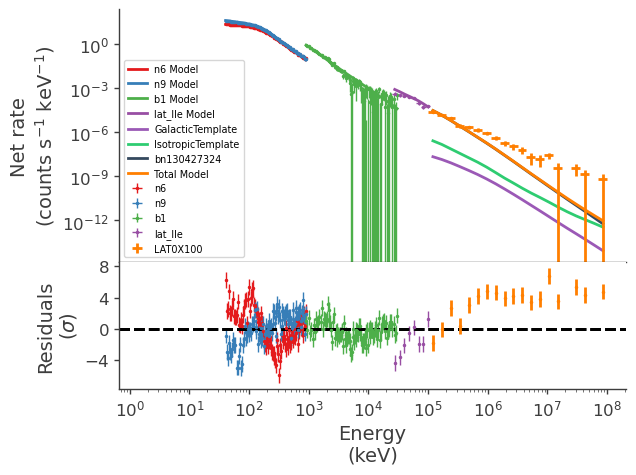

In [29]:
display_spectrum_model_counts(jl_1);

## Define a second model to test

In [31]:
spectrum = Band() + Powerlaw()
# spectrum.K_1 = 0.1
# spectrum.break_energy_1 = 800
# spectrum.beta_1 = -3
# spectrum.K_2 = 3
source_2 = PointSource("%s_2" % trigger_name, ra, dec, spectral_shape=spectrum)
comp_model = Model(source_2)
comp_model.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (6):
--------------------

                          value min_value max_value            unit
bn130427324_2...K_1      0.0001       0.0      None  keV-1 s-1 cm-2
bn130427324_2...alpha_1    -1.0      -1.5       3.0                
bn130427324_2...xp_1      500.0      10.0      None             keV
bn130427324_2...beta_1     -2.0      -5.0      -1.6                
bn130427324_2...K_2         1.0       0.0    1000.0  keV-1 s-1 cm-2
bn130427324_2...index_2   -2.01     -10.0      10.0                

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

## Run the joint fit again

In [32]:
datalist_2 = DataList(*gbm_plugins, lle_plugin, LAT_plugin)
jl_2 = JointLikelihood(comp_model, datalist_2, verbose=False)
comp_model[LAT_plugin.get_name() + "_GalacticTemplate_Value"].value = 1.0
comp_model[LAT_plugin.get_name() + "_GalacticTemplate_Value"].fix = True
comp_model[LAT_plugin.get_name() + "_IsotropicTemplate_Normalization"].fix = False
jl_2.set_minimizer("minuit")
jl_2.fit();


Found Isotropic template for irf P8R3_TRANSIENT010E_V3: /opt/anaconda/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT010E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT010E_V3: /opt/anaconda/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



18:26:45 INFO      set the minimizer to minuit                                             ]8;id=830224;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=619932;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=903542;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=94455;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1062\1062]8;;\

18:26:48 WARNING   73.98 percent of samples have been thrown away because they failed the  ]8;id=988063;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=331478;file:///opt/anaconda/envs/fermi/lib/python3.9/site-packages/threeML/analysis_results.py#1740\1740]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

Best fit values:

result  \
parameter                                                                  
bn130427324_2.spectrum.main.composite.K_1      (1.482 +/- 0.005) x 10^-1   
bn130427324_2.spectrum.main.composite.alpha_1   (-9.18 +/- 0.05) x 10^-1   
bn130427324_2.spectrum.main.composite.xp_1        (7.96 +/- 0.07) x 10^2   
bn130427324_2.spectrum.main.composite.beta_1            -3.022 +/- 0.030   
bn130427324_2.spectrum.main.composite.K_2                  1.1 -0.6 +1.5   
bn130427324_2.spectrum.main.composite.index_2             -1.71 +/- 0.06   
cons_lat_lle                                     (8.00 +/- 0.06) x 10^-1   
LAT0X100_IsotropicTemplate_Normalization               5.0000 +/- 0.0004   

                                                          unit  
parameter                                                       
bn130427324_2.spectrum.main.composite.K_1      1 / (keV s cm2)  
bn130427324_2.spectrum.main.composite.alpha_1                   
bn130427324_2.spectrum.main.composite.xp_1                 keV  
bn130427324_2.spectrum.main.composite.beta_1                    
bn130427324_2.spectrum.main.composite.K_2      1 / (keV s cm2)  
bn130427324_2.spectrum.main.composite.index_2                   
cons_lat_lle                                                    
LAT0X100_IsotropicTemplate_Normalization

Correlation matrix:

1.00  0.26 -0.72  0.56 -0.61  0.59 -0.01  0.00
 0.26  1.00 -0.73  0.06  0.25 -0.26 -0.00 -0.00
-0.72 -0.73  1.00 -0.38  0.10 -0.08  0.01  0.00
 0.56  0.06 -0.38  1.00 -0.57  0.52 -0.03  0.00
-0.61  0.25  0.10 -0.57  1.00 -0.99  0.01 -0.00
 0.59 -0.26 -0.08  0.52 -0.99  1.00 -0.01  0.00
-0.01 -0.00  0.01 -0.03  0.01 -0.01  1.00  0.00
 0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
n6             1114.345656
n9             1061.448392
b1              880.534406
lat_lle          70.127008
LAT0X100       1811.599463
total          4938.054925

Values of statistical measures:

statistical measures
AIC           9892.382577
BIC           9926.397835

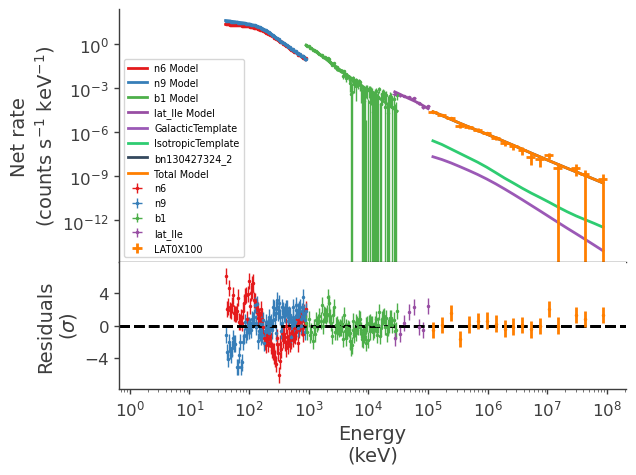

In [33]:
display_spectrum_model_counts(jl_2, show_residuals=True);

In [36]:
jl_1.results.get_statistic_measure_frame()

statistical measures
AIC          10148.573412
BIC          10174.130910

In [37]:
jl_2.results.get_statistic_measure_frame()

statistical measures
AIC           9892.382577
BIC           9926.397835

## Plot the two components of the best-fit spectrum 

processing MLE analyses:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|                                                        | 0/100 [00:00<?, ?it/s]

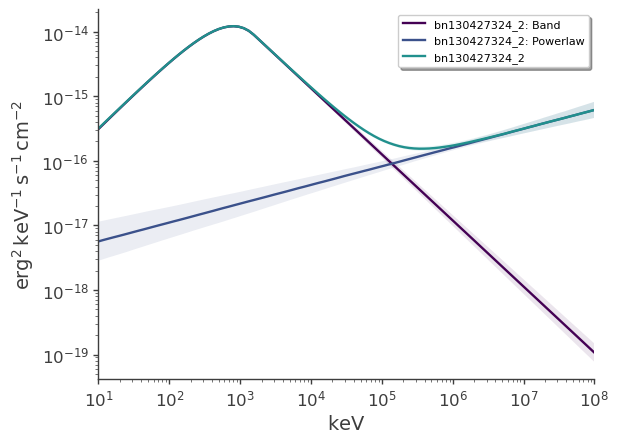

In [38]:
fig = plot_spectra(jl_2.results,
    ene_min=10 * u.keV,
    ene_max=100 * u.GeV,
    flux_unit="erg2/(cm2 s keV)",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1),
    use_components=True,
    components_to_use = ["total", "Band", "Powerlaw"],
)

## Compute the flux

In [39]:
jl_2.results.get_flux(ene_min=10 * u.keV, ene_max=100 * u.GeV, use_components=True, flux_unit="1/(cm2 s)")

processing MLE analyses:   0%|                                                     | 0/1 [00:00<?, ?it/s]

flux  \
bn130427324_2: Band      56.289955999553214 1 / (s cm2)   
bn130427324_2: Powerlaw  0.3242579056985909 1 / (s cm2)   

                                               low bound  \
bn130427324_2: Band        56.08441361146358 1 / (s cm2)   
bn130427324_2: Powerlaw  0.17627664818847358 1 / (s cm2)   

                                               hi bound  
bn130427324_2: Band       56.48578222662643 1 / (s cm2)  
bn130427324_2: Powerlaw  0.6035956921340245 1 / (s cm2)

In [40]:
jl_2.results.get_flux(ene_min=10 * u.keV, ene_max=100 * u.GeV, use_components=False, flux_unit="1/(cm2 s)")

processing MLE analyses:   0%|                                                     | 0/1 [00:00<?, ?it/s]

flux  \
bn130427324_2: total  56.652554112036675 1 / (s cm2)   

                                           low bound  \
bn130427324_2: total  56.494395538618775 1 / (s cm2)   

                                           hi bound  
bn130427324_2: total  56.85080022660372 1 / (s cm2)